### Importing libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

### Reading in and exploring data

In [7]:
forest_fires = pd.read_csv("data/forestfires.csv")

In [15]:
forest_fires.head()

,X,Y,month,day,temp,wind,rain,area
0,7,5,mar,fri,8.2,6.7,0.0,NaN
1,7,4,oct,tue,18.0,0.9,0.0,NaN
2,7,4,oct,sat,14.6,1.3,0.0,NaN
3,8,6,mar,fri,8.3,4.0,0.2,NaN
4,8,6,mar,sun,11.4,1.8,0.0,NaN


In [16]:
forest_fires.shape

(517, 8)

In [17]:
forest_fires.describe()

,X,Y,temp,wind,rain,area
count,517.000000,517.000000,515.000000,516.000000,517.000000,379.000000
mean,4.669246,4.299807,18.904272,4.019380,0.021663,17.525198
std,2.313778,1.229900,5.801947,1.792934,0.295959,73.818628
min,1.000000,2.000000,2.200000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,15.550000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,19.300000,4.000000,0.000000,2.570000
75%,7.000000,5.000000,22.800000,4.900000,0.000000,9.985000
max,9.000000,9.000000,33.300000,9.400000,6.400000,1090.840000


In [18]:
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   temp    515 non-null    float64
 5   wind    516 non-null    float64
 6   rain    517 non-null    float64
 7   area    379 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 32.4+ KB


In [30]:
forest_fires.columns

Index(['X', 'Y', 'month', 'day', 'temp', 'wind', 'rain', 'area'], dtype='object')

### Dealing with missing data

In [19]:
forest_fires.isna().sum()

X          0
Y          0
month      0
day        0
temp       2
wind       1
rain       0
area     138
dtype: int64

In [20]:
forest_fires.fillna({"area" : 0}, inplace = True)

In [21]:
forest_fires.isna().sum()

X        0
Y        0
month    0
day      0
temp     2
wind     1
rain     0
area     0
dtype: int64

In [26]:
forest_fires.dropna(inplace = True)

In [27]:
forest_fires.isna().sum()

X        0
Y        0
month    0
day      0
temp     0
wind     0
rain     0
area     0
dtype: int64

### Analysis with 'verbs'
#### Select

In [41]:
forest_fires = forest_fires.drop(columns = ["X","Y"]) # dropping X and Y columns

In [42]:
forest_fires

,month,day,temp,wind,rain,area
0,mar,fri,8.2,6.7,0.0,0.00
1,oct,tue,18.0,0.9,0.0,0.00
2,oct,sat,14.6,1.3,0.0,0.00
3,mar,fri,8.3,4.0,0.2,0.00
4,mar,sun,11.4,1.8,0.0,0.00
...,...,...,...,...,...,...
512,aug,sun,27.8,2.7,0.0,6.44
513,aug,sun,21.9,5.8,0.0,54.29
514,aug,sun,21.2,6.7,0.0,11.16
515,aug,sat,25.6,4.0,0.0,0.00


#### Arrange

In [44]:
forest_fires.sort_values("area", ascending = False, inplace= True) # arranging data by highest area value 

In [45]:
forest_fires

,month,day,temp,wind,rain,area
238,sep,sat,25.1,4.0,0.0,1090.84
415,aug,thu,27.5,4.9,0.0,746.28
479,jul,mon,22.6,4.9,0.0,278.53
237,sep,tue,18.8,2.2,0.0,212.88
236,sep,sat,18.2,1.8,0.0,200.94
...,...,...,...,...,...,...
117,mar,sat,15.2,4.9,0.0,0.00
116,mar,sat,11.6,6.3,0.0,0.00
115,mar,tue,15.5,6.3,0.0,0.00
114,mar,tue,15.8,7.6,0.0,0.00


#### Filter

In [48]:
forest_fires = forest_fires.loc[forest_fires["area"] != 0]
# filtering data so it only contains rows where area value is > 0
forest_fires

,month,day,temp,wind,rain,area
238,sep,sat,25.1,4.0,0.0,1090.84
415,aug,thu,27.5,4.9,0.0,746.28
479,jul,mon,22.6,4.9,0.0,278.53
237,sep,tue,18.8,2.2,0.0,212.88
236,sep,sat,18.2,1.8,0.0,200.94
...,...,...,...,...,...,...
439,sep,fri,19.1,2.2,0.0,0.33
251,aug,wed,24.0,3.1,0.0,0.24
252,aug,wed,22.1,3.6,0.0,0.21
266,aug,tue,19.4,4.0,0.0,0.17


#### Mutate

In [50]:
forest_fires["is_rain"] = forest_fires["rain"] > 0 
# creating a new column called is_rain, which equals True whenever rain is > 0
forest_fires

,month,day,temp,wind,rain,area,is_rain
238,sep,sat,25.1,4.0,0.0,1090.84,False
415,aug,thu,27.5,4.9,0.0,746.28,False
479,jul,mon,22.6,4.9,0.0,278.53,False
237,sep,tue,18.8,2.2,0.0,212.88,False
236,sep,sat,18.2,1.8,0.0,200.94,False
...,...,...,...,...,...,...,...
439,sep,fri,19.1,2.2,0.0,0.33,False
251,aug,wed,24.0,3.1,0.0,0.24,False
252,aug,wed,22.1,3.6,0.0,0.21,False
266,aug,tue,19.4,4.0,0.0,0.17,False


#### Group by and Summarise

In [52]:
avg_area_by_month = forest_fires.groupby("month")["area"].mean()
avg_area_by_month

month
apr    20.005000
aug    23.441939
dec    13.330000
feb    12.550000
jul    25.546111
jun    12.412500
mar    12.382105
may    38.480000
oct    19.914000
sep    31.815773
Name: area, dtype: float64

In [54]:
avg_area_by_day = forest_fires.groupby("day")["area"].mean()
avg_area_by_day

day
fri    10.400930
mon    18.116154
sat    51.068095
sun    20.424043
thu    32.164516
tue    22.438611
wed    18.642581
Name: area, dtype: float64

In [56]:
avg_area_by_is_rain = forest_fires.groupby("is_rain")["area"].mean()
avg_area_by_is_rain

is_rain
False    24.825393
True      6.495000
Name: area, dtype: float64

### Plotting 

In [57]:
%matplotlib inline

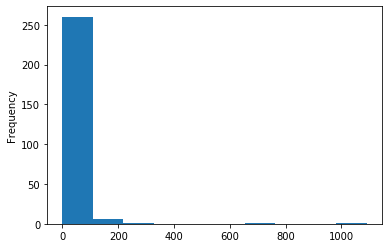

In [58]:
forest_fires["area"].plot(kind = "hist")

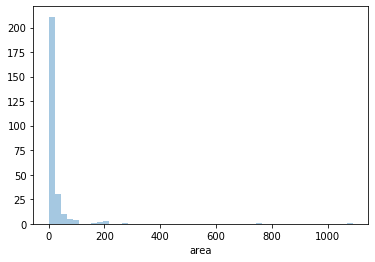

In [59]:
sns.distplot(forest_fires["area"], kde = False)

Text(0.5, 1.0, 'Temperature v Area')

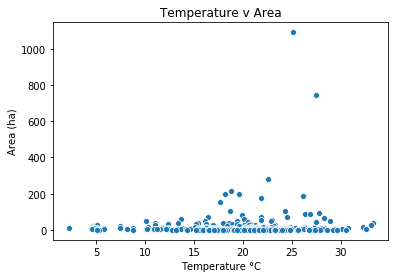

In [61]:
sns.scatterplot(x = 'temp', y = "area", data = forest_fires)
# plotting a scatter plot - temp v area
plt.xlabel("Temperature °C")
plt.ylabel("Area (ha)")
plt.title("Temperature v Area")